In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv("/home/zainab/Downloads/superheated_vapor_properties.csv")

In [4]:
print(df.shape)

(544, 37)


In [7]:
V_data=pd.DataFrame()
for x in range(len(df.index)):
     if(df['Property'].values[x]=="V"):
        V_data=V_data.append(df.loc[x],ignore_index=True)

file=V_data.loc[:,["Liq_Sat","Pressure"]]

file

Liq_Sat  Pressure
0      1.000       1.0
1      1.010      10.0
2      1.017      20.0
3      1.022      30.0
4      1.027      40.0
..       ...       ...
131    1.474   10600.0
132    1.481   10800.0
133    1.489   11000.0
134    1.496   11200.0
135    1.504   11400.0

[136 rows x 2 columns]

# ( 300 <P )

## sklearn- 


In [10]:
df1 = file[(file['Pressure']<300) ]

In [11]:
df1

Liq_Sat  Pressure
0     1.000     1.000
1     1.010    10.000
2     1.017    20.000
3     1.022    30.000
4     1.027    40.000
5     1.030    50.000
6     1.037    75.000
7     1.043   100.000
8     1.044   101.325
9     1.049   125.000
10    1.053   150.000
11    1.057   175.000
12    1.061   200.000
13    1.064   225.000
14    1.068   250.000
15    1.071   275.000

In [12]:
target,data=df1["Liq_Sat"],df1[["Pressure"]]
linear_regression.fit(data, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
m= linear_regression.coef_[0]
c=linear_regression.intercept_

In [14]:
m,c

(0.00023137328921369132, 1.0143878627679743)

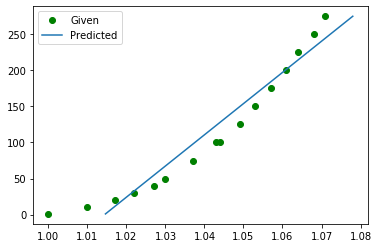

In [15]:
y=m*df1["Pressure"]+c

plt.plot(target,data,"go")
plt.plot(y,data)



plt.legend(["Given","Predicted"])
plt.show()


In [16]:
r2_score(target,y)

0.9263208134364594

# ( 300 <P )

## scratch- 

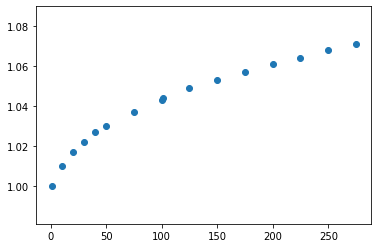

In [27]:

plt.scatter( df1["Pressure"],df1["Liq_Sat"] );
x,y=df1["Pressure"],df1["Liq_Sat"] 


In [28]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [29]:
L=[]
N=x.shape[0]

In [30]:
def line(x,m,c):
    return m*x+c

no of iterations: 0


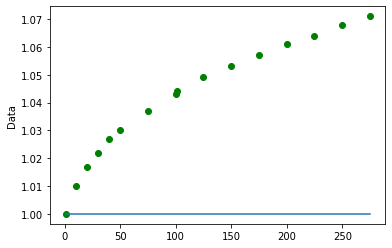

no of iterations: 5000


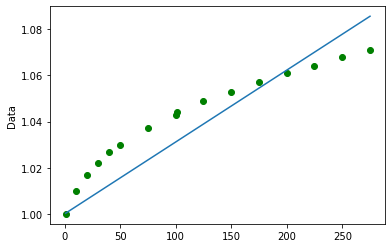

no of iterations: 10000


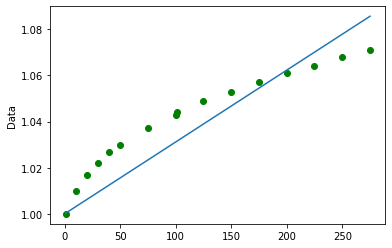

no of iterations: 15000


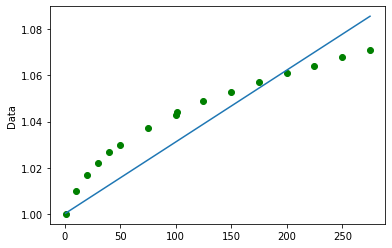

no of iterations: 20000


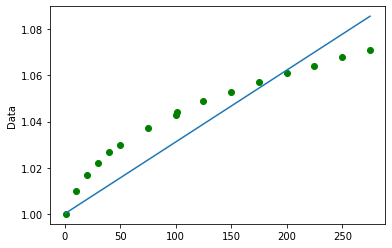

no of iterations: 25000


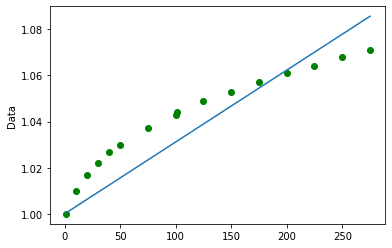

no of iterations: 30000


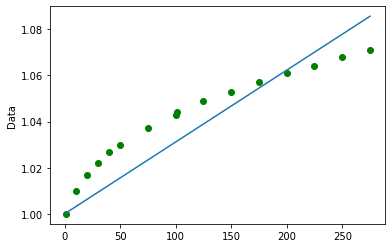

no of iterations: 35000


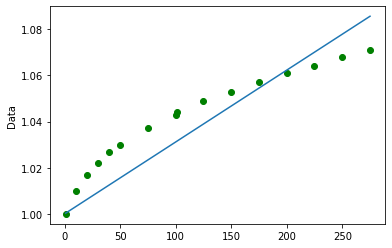

no of iterations: 40000


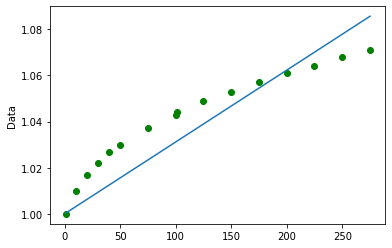

no of iterations: 45000


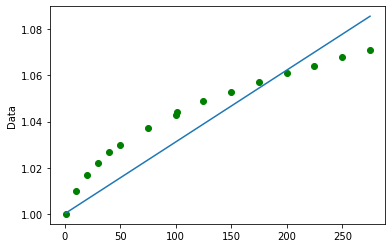

no of iterations: 50000


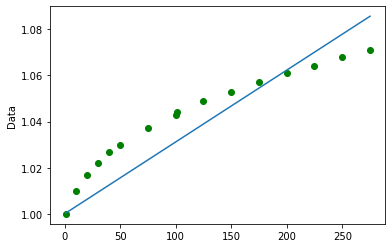

In [90]:
m1=0.00000000001

c1=1
dm1=0

dc=0
learningrate=0.0000001
numiter=50001

for i in range(numiter):
    
    y_p=line(x,m1,c1)
    
    grad=(y_p-y)
    
    
    dm1=(1/N)*np.sum(np.multiply(x,grad))
    
    dc=(1/N)*np.sum(grad)
        
    m1 = m1 -learningrate * dm1
    
    c1 = c1 - learningrate * dc
    if i%5000==0:
        L.append(loss(y_p,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_p)
    #plt.plot(x,m1*x+c1,'r*')
        plt.ylabel('Data')
        plt.show()

In [91]:

m1,c1

(0.000311158004863465, 1.0000279933040959)

In [92]:
r2_score(y,y_p)

0.7527400187666176

# sklearn- 
## ( 300 <= P < 1500)

In [59]:
df2 = file[(file['Pressure']>=300) & (file['Pressure']<1500)]

In [60]:
df2

Liq_Sat  Pressure
16    1.073     300.0
17    1.076     325.0
18    1.079     350.0
19    1.081     375.0
20    1.084     400.0
21    1.086     425.0
22    1.088     450.0
23    1.091     475.0
24    1.093     500.0
25    1.095     525.0
26    1.097     550.0
27    1.099     575.0
28    1.101     600.0
29    1.103     625.0
30    1.105     650.0
31    1.106     675.0
32    1.108     700.0
33    1.110     725.0
34    1.112     750.0
35    1.113     775.0
36    1.115     800.0
37    1.117     825.0
38    1.118     850.0
39    1.120     875.0
40    1.121     900.0
41    1.123     925.0
42    1.124     950.0
43    1.126     975.0
44    1.127    1000.0
45    1.130    1050.0
46    1.133    1100.0
47    1.136    1150.0
48    1.139    1200.0
49    1.141    1250.0
50    1.144    1300.0
51    1.146    1350.0
52    1.149    1400.0
53    1.151    1450.0

In [61]:
target,data=df2["Liq_Sat"],df2[["Pressure"]]
linear_regression.fit(data, target)
m= linear_regression.coef_[0]
c=linear_regression.intercept_

In [58]:
m,c

(6.677103585859446e-05, 1.0592155742277978)

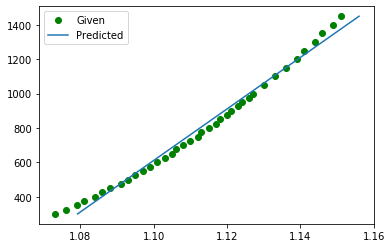

In [59]:
y=m*df2["Pressure"]+c

plt.plot(target,data,"go")
plt.plot(y,data)



plt.legend(["Given","Predicted"])
plt.show()


In [60]:
r2_score(target,y)

0.9870087187227412

## scratch

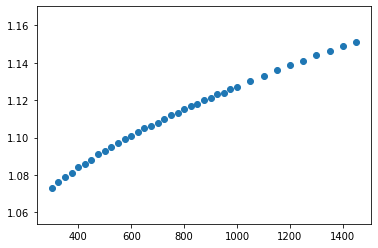

In [95]:
plt.scatter( df2["Pressure"],df2["Liq_Sat"] );
x,y=df2["Pressure"],df2["Liq_Sat"] 

In [96]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [97]:
L=[]
N=x.shape[0]

In [98]:
def line(x,m,c):
    return m*x+c

no of iterations: 0


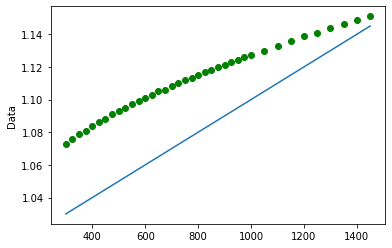

no of iterations: 5000


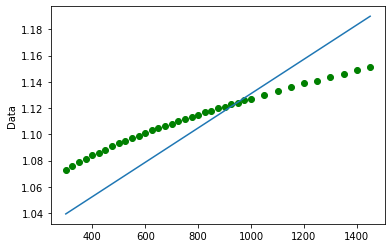

no of iterations: 10000


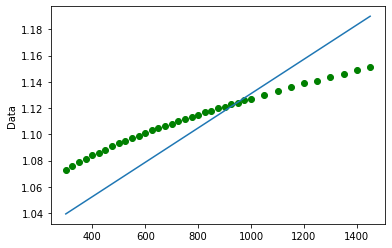

no of iterations: 15000


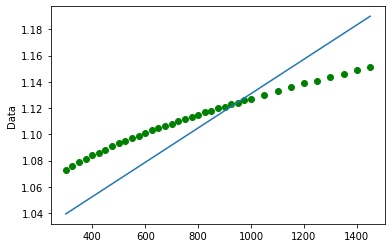

no of iterations: 20000


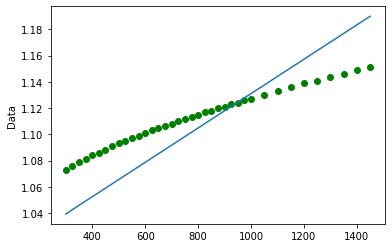

no of iterations: 25000


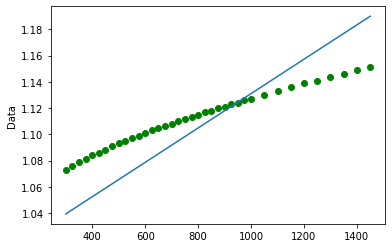

no of iterations: 30000


no of iterations: 35000


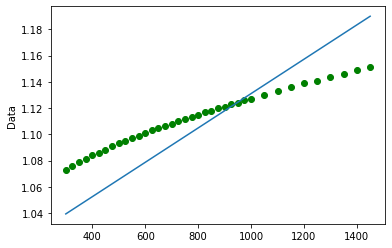

no of iterations: 40000


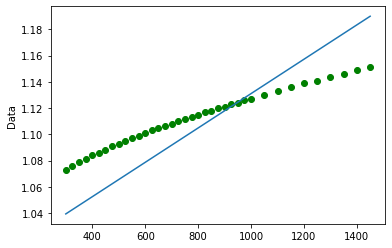

no of iterations: 45000


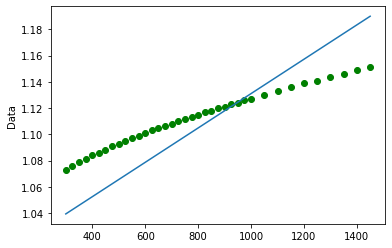

no of iterations: 50000


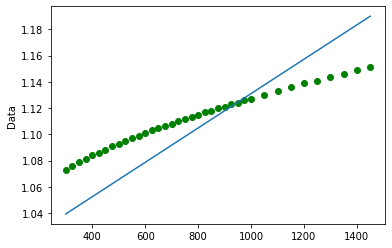

In [110]:
m1=0.0001

c1=1
dm1=0

dc=0
learningrate=0.0000001
numiter=50001

for i in range(numiter):
    
    y_p=line(x,m1,c1)
    
    grad=(y_p-y)
    
    
    dm1=(1/N)*np.sum(np.multiply(x,grad))
    
    dc=(1/N)*np.sum(grad)
        
    m1 = m1 -learningrate * dm1
    
    c1 = c1 - learningrate * dc
    if i%5000==0:
        L.append(loss(y_p,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_p)
    
        plt.ylabel('Data')
        plt.show()

In [111]:
m1,c1

(0.00013099379962359212, 1.0000415631932111)

In [112]:
r2_score(y,y_p)

-0.07513134505902896

# sklearn- 
## ( P>= 1500)

In [94]:
df3 = file[(file['Pressure']>=1500) ]
df3

Liq_Sat  Pressure
54     1.154    1500.0
55     1.156    1550.0
56     1.159    1600.0
57     1.161    1650.0
58     1.163    1700.0
..       ...       ...
131    1.474   10600.0
132    1.481   10800.0
133    1.489   11000.0
134    1.496   11200.0
135    1.504   11400.0

[82 rows x 2 columns]

In [48]:
target,data=df3["Liq_Sat"],df3[["Pressure"]]
linear_regression.fit(data, target)
m= linear_regression.coef_[0]
c=linear_regression.intercept_

In [49]:
m,c

(3.442362306207059e-05, 1.1107246430495454)

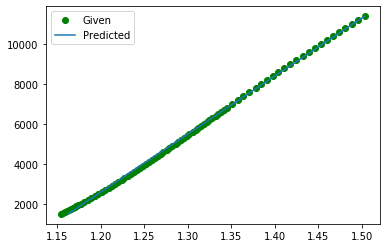

In [50]:
y=m*df3["Pressure"]+c

plt.plot(target,data,"go")
plt.plot(y,data)



plt.legend(["Given","Predicted"])
plt.show()


In [53]:
r2_score(target,y)

0.9990370407798591

# scratch

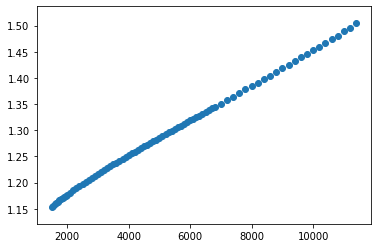

In [113]:
plt.scatter( df3["Pressure"],df3["Liq_Sat"] );m1,c1
x,y=df3["Pressure"],df3["Liq_Sat"] 

In [114]:
def loss(y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [115]:
L=[]
N=x.shape[0]

In [116]:
def line(x,m,c):
    return m*x+c

no of iterations: 0


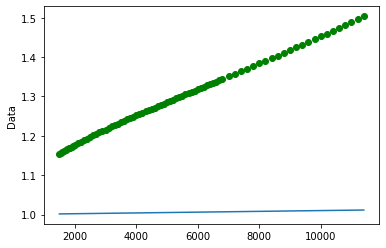

no of iterations: 5000


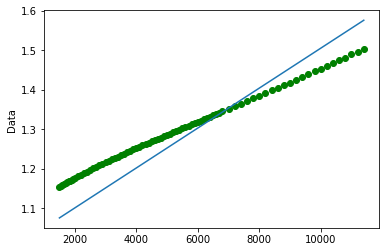

no of iterations: 10000


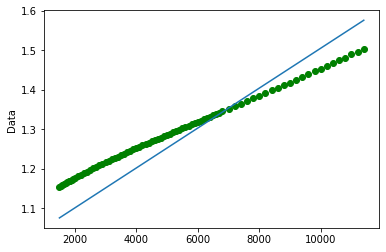

no of iterations: 15000


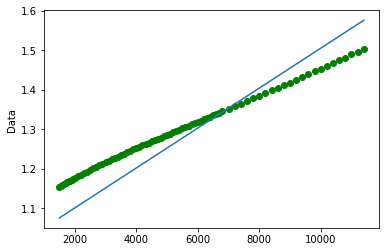

no of iterations: 20000


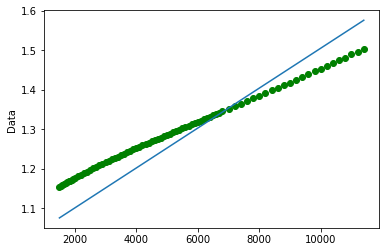

no of iterations: 25000


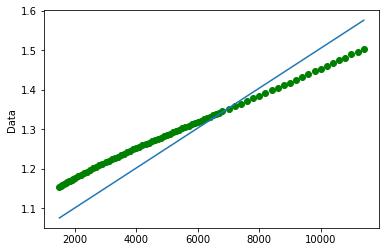

no of iterations: 30000


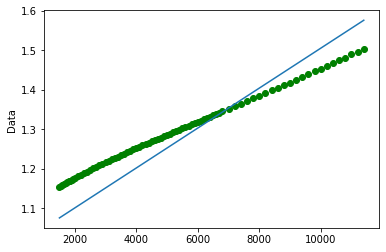

no of iterations: 35000


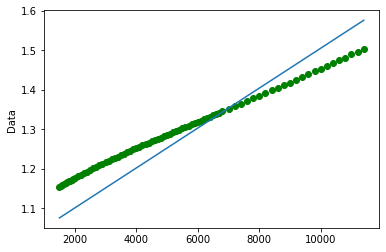

no of iterations: 40000


no of iterations: 45000


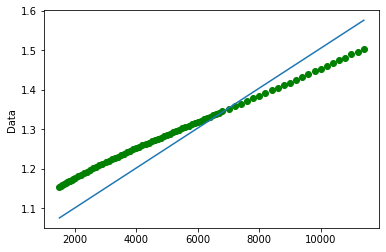

no of iterations: 50000


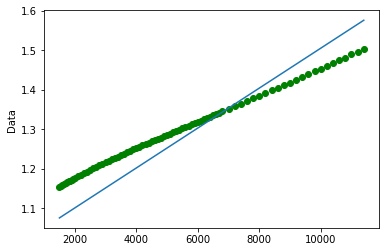

In [120]:
m1=0.000001

c1=1
dm1=0

dc=0
learningrate=0.00000001
numiter=50001

for i in range(numiter):
    
    y_p=line(x,m1,c1)
    
    grad=(y_p-y)
    
    
    dm1=(1/N)*np.sum(np.multiply(x,grad))
    
    dc=(1/N)*np.sum(grad)
        
    m1 = m1 -learningrate * dm1
    
    c1 = c1 - learningrate * dc
    if i%5000==0:
        L.append(loss(y_p,y))
        print ("no of iterations:",i )
        plt.plot(x,y,'go')
        plt.plot(x,y_p)
    
        plt.ylabel('Data')
        plt.show()

In [121]:
m1,c1

(5.04841575952124e-05, 1.0000118394214648)

In [122]:
r2_score(y,y_p)

0.7224593024278124